predicted begin lat mean  36.40344073347092


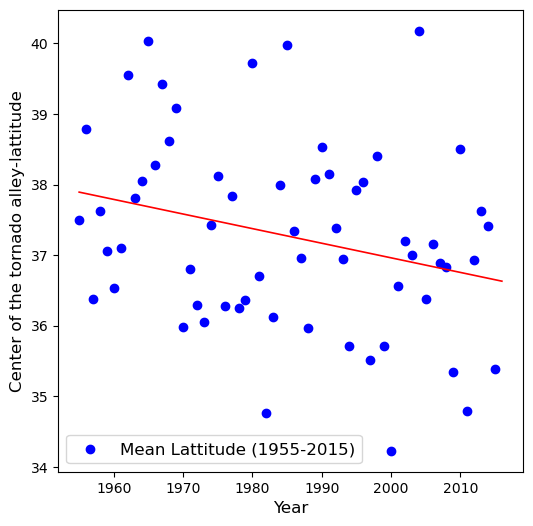

predicted begin lon mean  -90.08594282671027


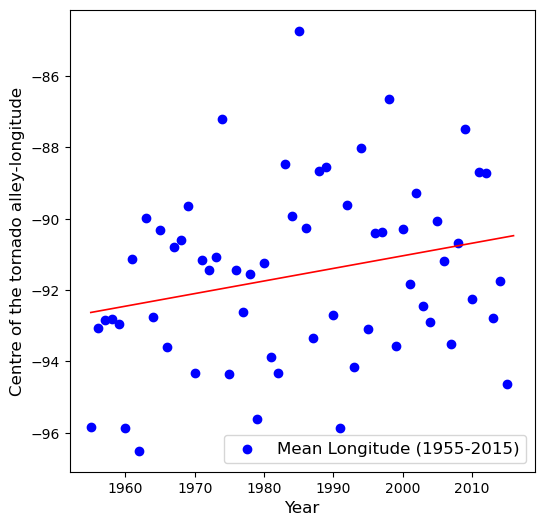

predicted begin lat std  3.1247098574429444


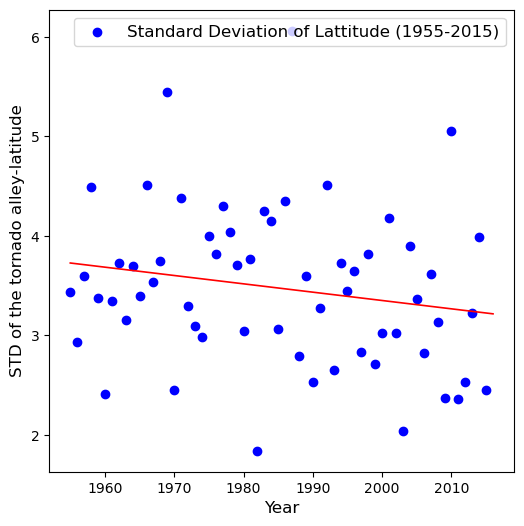

predicted begin lon std  4.934424029953123


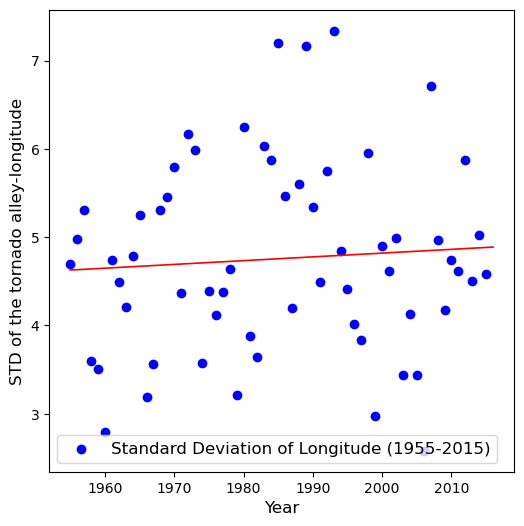

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression

#load dataframe

regress_df = pd.read_csv("regressdf.csv")

prediction_year = 2027 #change according to the year which we want the prediction for

#target 1: mean tornado origin latitude

X_systematic = np.linspace(1955, 2016, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_mean'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

#optional: print the coefficients
#print("Intercept (beta_0):", reg.intercept_)
#print("Coefficient (beta_1):", reg.coef_[0])

b0 = reg.intercept_
b1 = reg.coef_[0]
predicted_lat_mean = b1*prediction_year + b0
print("predicted begin lat mean ",predicted_lat_mean )

#plot after the regression with data and the fitted model
plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Mean Lattitude (1955-2015)")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Center of the tornado alley-lattitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)
plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)
plt.show()

#target 2: mean tornado origin longitude

X_systematic = np.linspace(1955, 2016, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_mean'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

#print("Intercept (beta_0):", reg.intercept_)
#print("Coefficient (beta_1):", reg.coef_[0])

b0 = reg.intercept_
b1 = reg.coef_[0]

predicted_lon_mean = b1*prediction_year + b0
print("predicted begin lon mean ", predicted_lon_mean )

#plot after the regression with data and the fitted model
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c="b", label="Mean Longitude (1955-2015)")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Centre of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)
plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)
plt.show()

#target 3: standard deviation tornado origin latitude


X_systematic = np.linspace(1955, 2016, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_std'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

#print("Intercept (beta_0):", reg.intercept_)
#print("Coefficient (beta_1):", reg.coef_[0])

b0 = reg.intercept_
b1 = reg.coef_[0]

predicted_lat_std = b1*prediction_year + b0
print("predicted begin lat std ",predicted_lat_std )

#plot after the regression with data and the fitted model
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c="b", label="Standard Deviation of Lattitude (1955-2015)")
plt.xlabel("Year", fontsize=12)
plt.ylabel("STD of the tornado alley-latitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)
plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)
plt.show()

#target 4: standard deviation tornado origin longitude

X_systematic = np.linspace(1955, 2016, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_std'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

#print("Intercept (beta_0):", reg.intercept_)
#print("Coefficient (beta_1):", reg.coef_[0])

b0 = reg.intercept_
b1 = reg.coef_[0]

predicted_lon_std = b1*prediction_year + b0
print("predicted begin lon std ", predicted_lon_std )


#plot after the regression with data and the fitted model
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c="b", label="Standard Deviation of Longitude (1955-2015)")
plt.xlabel("Year", fontsize=12)
plt.ylabel("STD of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)
plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)
plt.show()


Cross validation:

In [2]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import numpy as np

# Predictor and target
X = regress_df[['year']]
y = regress_df['begin_lat_mean']

# K-Fold setup without shuffling
kfold = KFold(n_splits=5, shuffle=False)

# Define scoring metrics
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Model
model = LinearRegression()

# Perform cross-validation for MSE
mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring=mse_scorer)
print("MSE for 'begin_lat_mean' ~ year:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Std Dev MSE:", np.std(mse_scores))

# Perform cross-validation for MAE
mae_scores = -cross_val_score(model, X, y, cv=kfold, scoring=mae_scorer)
print("MAE for 'begin_lat_mean' ~ year:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))
print("Std Dev MAE:", np.std(mae_scores))

# Predictor and target
X = regress_df[['year']]
y = regress_df['begin_lat_std']

# K-Fold setup without shuffling
kfold = KFold(n_splits=5, shuffle=False)

# Define scoring metrics
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Model
model = LinearRegression()

# Perform cross-validation for MSE
mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring=mse_scorer)
print("MSE for 'begin_lat_std' ~ year:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Std Dev MSE:", np.std(mse_scores))

# Perform cross-validation for MAE
mae_scores = -cross_val_score(model, X, y, cv=kfold, scoring=mae_scorer)
print("MAE for 'begin_lat_mean' ~ year:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))
print("Std Dev MAE:", np.std(mae_scores))

# Predictor and target
X = regress_df[['year']]
y = regress_df['begin_lon_mean']

# K-Fold setup without shuffling
kfold = KFold(n_splits=5, shuffle=False)

# Define scoring metrics
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Model
model = LinearRegression()

# Perform cross-validation for MSE
mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring=mse_scorer)
print("MSE for 'begin_lon_mean' ~ year:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Std Dev MSE:", np.std(mse_scores))

# Perform cross-validation for MAE
mae_scores = -cross_val_score(model, X, y, cv=kfold, scoring=mae_scorer)
print("MAE for 'begin_lat_mean' ~ year:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))
print("Std Dev MAE:", np.std(mae_scores))


# Predictor and target
X = regress_df[['year']]
y = regress_df['begin_lon_std']

# K-Fold setup without shuffling
kfold = KFold(n_splits=5, shuffle=False)

# Define scoring metrics
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Model
model = LinearRegression()

# Perform cross-validation for MSE
mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring=mse_scorer)
print("MSE for 'begin_lat_mean' ~ year:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Std Dev MSE:", np.std(mse_scores))

# Perform cross-validation for MAE
mae_scores = -cross_val_score(model, X, y, cv=kfold, scoring=mae_scorer)
print("MAE for 'begin_lon_std' ~ year:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))
print("Std Dev MAE:", np.std(mae_scores))



MSE for 'begin_lat_mean' ~ year: [1.57331432 1.34422883 2.29758893 1.53429957 2.03364792]
Mean MSE: 1.7566159132149934
Std Dev MSE: 0.352841513302988
MAE for 'begin_lat_mean' ~ year: [0.98905796 1.05088348 1.26461178 0.94985693 1.10525471]
Mean MAE: 1.0719329721379518
Std Dev MAE: 0.10995396349065051
MSE for 'begin_lat_std' ~ year: [0.52290658 0.63088047 1.09246723 0.4614493  0.61059305]
Mean MSE: 0.6636593240655559
Std Dev MSE: 0.2229201355378906
MAE for 'begin_lat_mean' ~ year: [0.63023096 0.64186339 0.79666843 0.57658444 0.63311746]
Mean MAE: 0.6556929366204493
Std Dev MAE: 0.07413698843248229
MSE for 'begin_lon_mean' ~ year: [6.4071758  5.08766122 9.74228018 5.02225876 6.07327337]
Mean MSE: 6.466529864635679
Std Dev MSE: 1.7248716765508585
MAE for 'begin_lat_mean' ~ year: [2.05279654 1.81645649 2.65983096 1.93825003 2.09024476]
Mean MAE: 2.111515756961988
Std Dev MAE: 0.2903897211256994
MSE for 'begin_lat_mean' ~ year: [1.67887145 0.87522698 1.97830101 1.33617446 1.29588352]
Mean M